  Activating project at `~/Documents/Research/dfno`


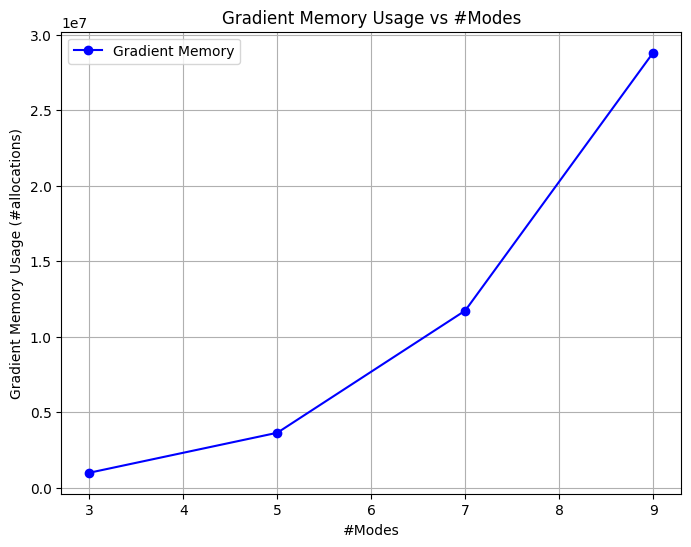

In [5]:
using Pkg
Pkg.activate("./")
using PyPlot

using PyPlot

# Data points
modes = [3, 5, 7, 9]
mem = [992.16e3, 3.64e6, 11.73e6, 28.81e6]  # Convert from Megabytes to bytes

# Plotting
figure(figsize=(8, 6))
plot(modes, mem, marker="o", linestyle="-", color="b")

xlabel("#Modes")
ylabel("Gradient Memory Usage (#allocations)")
title("Gradient Memory Usage vs #Modes")
legend(["Gradient Memory"], loc="upper left")

grid(true)
show()



In [14]:
using OMEinsum
using LinearAlgebra
using Zygote
k = 2
n = 40
G = rand(k,k,k,k)
U1 = rand(n,k)
U2 = rand(n,k)
U3 = rand(n,k)
U4 = rand(n,k)
x = rand(n,n,n,n)
# T tucker(G,U1,U2,U3)
@time T = ein"abcd,ia,jb,kc,ld,ijkm->ijlm"(G,U1,U2,U3,U4,x)
# W = ein"abcd,ia,jb,kc,ld->ijkl"(G,U1,U2,U3,U4)
# @time S = ein"ijkl,ijkm->ijlm"(W,x)

# @assert norm(T == S) < 1e-10
# println("Verified that einsum using joint W and without are equal")
println("Now computing the gradient of norm(einsum) wrt factor G")
@time gradient(G->norm(ein"abcd,ia,jb,kc,ld,ijkm->ijlm"(G,U1,U2,U3,U4,x)),G)[1]


  5.768695 seconds (37 allocations: 19.534 MiB)


40×40×40×40 Array{Float64, 4}:
[:, :, 1, 1] =
 12.7716   13.2098   11.3068   19.4148   …  14.3274    9.03303  14.7082
  2.59298   3.0383    3.17702   5.75331      3.28608   2.05451   3.61157
 17.2005   18.3982   20.5562   32.5216      21.0354   13.9052   19.2513
 11.5931   13.6338   15.2666   21.3978      13.8496    9.88758  17.0908
  9.74762  10.9254   10.4273   15.4122      11.8732    7.62612  12.608
 18.0217   19.2336   16.3797   27.0323   …  19.6475   10.7781   20.1119
  5.72565   6.66879   5.96422   9.17954      6.91485   4.46955   7.51355
 13.1098   15.1062   14.9858   29.2888      18.9357    8.37483  16.1627
  7.90973   7.3272    6.50595  11.2042       8.5689    4.10667   8.92853
  6.95326   7.2153    7.46275  12.4879       8.18373   5.08655   8.72966
 19.3384   20.4914   19.1929   34.6793   …  19.4004   12.0561   20.6464
  4.63131   4.7471    4.50572   7.21523      5.132     3.31199   4.92552
  8.06319   9.94557   8.77059  16.5107       9.92194   5.73832   9.15293
  ⋮          

In [3]:
data["Loss"]

10-element Vector{Float32}:
 2.964684
 3.1919508
 2.9711657
 2.6895034
 2.5105476
 2.7412481
 3.0114408
 2.7444503
 2.7066956
 2.705436

In [2]:
using Pkg
Pkg.activate("./")
using OMEinsum

  Activating project at `~/Documents/Research/dfno`


LoadError: ArgumentError: Package OMEinsum not found in current path.
- Run `import Pkg; Pkg.add("OMEinsum")` to install the OMEinsum package.

In [ ]:

# Access the values using the keys defined with @strdict
loss_valid_label = data["p"]["Loss_valid"]
loss_label = data["p"]["Loss"]

# Print the values
println("Loss_valid Label: ", loss_valid_label)
println("Loss Label: ", loss_label)